<a href="https://colab.research.google.com/github/NguyenTanTan/Bai-tap-python/blob/python/%C4%90%E1%BB%93_%C3%A1n_ph%C3%A2n_t%C3%ADnh_th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PHÂN TÍCH THỐNG KÊ MÔ TẢ**

Phân tích thống kê mô tả tập dữ liệu khảo sát chất lượng đời sống gia đình của các hộ dân trên địa bàn một tổ dân phố

# Mô tả các cột dữ liệu thu thập



* Dữ liệu được lấy từ 50 hộ dân
* Khảo sát theo các yếu tố sau:
 * Thu nhập hằng tháng: Mthly_HH_Income
 * Chi tiêu hằng tháng: Mthly_HH_Expense
 * Số lượng thành viên trong gia đình: No_of_Fly_Members
 * Tiền thuê nhà, chi phí phát sinh: Emi_or_Rent_Amt
 * Thu nhập hằng năm: Annual_HH_Income	
 * Trình độ học vấn cao nhất của gia đinh: Highest_Qualified_Member
 * Số lượng thành viên kiếm được thu nhập: No_of_Earning_Members

# Lấy dữ liệu phân tích thống kê mô tả

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dữ liệu/Inc_Exp_Data.csv')

In [35]:
df.head(10) # đơn vị nghìn đồng

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


# Hệ số tương quan
* Hệ số tương quan là chỉ số thống kê đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến số.

* Trong đó: Hệ số tương quan có giá trị từ -1.0 đến 1.0

 * Hệ số tương quan có giá trị âm cho thấy hai biến có mối quan hệ nghịch biến  (nghịch biến tuyệt đối khi giá trị bằng -1)
 * Hệ số tương quan có giá trị dương cho thấy hai biến mối quan hệ đồng biến (đồng biến tuyệt đối khi giá trị bằng 1)
 * Tương quan bằng 0 cho hai biến độc lập với nhau. 

**Công thức:**
  
*Hiệp phương sai*
* $cov(X,Y)=\frac{𝚺(x_i-\bar x)(y_i-\bar y)}{N-1}$

*Hệ số tương quan*
* $R=\frac{cov(X,Y)}{σ_X\timesσ_Y}$


$⇒R=\frac{𝚺(x_i-\bar x)(y_i-\bar y)}{\sqrt{𝜮(x_i-\bar x)^2𝜮(y_i-\bar y)^2}}$

Trong đó:
 * $X,Y$: hai biến
 * N: số phần tử
 * $i∈[0,N]$
 * $x_i, y_i: $Các phần tử của X, Y
 * $\bar x,\bar y: $ Trung bình của X,Y
 * $σ$: độ lệch chuẩn

# Hàm tính hệ số tương quan


In [5]:
def correlation(x, y):
    # Tính trung bình của hai biến x và y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Giá trị sai lệch của các phần tử so với giá trị trung bính
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # Hiệp phương sai, không chia cho N-1 vì nó sẽ được triệt tiêu.
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Phương sai, không chia cho N-1 (ước lượng không chệch) vì nó sẽ được triệt tiêu. 
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # Tính hệ số tương quan
    denominator = (std_deviation_x*std_deviation_y)**0.5 
    cor = numerator/denominator
    return cor



# Hàm vẽ biểu đồ

In [6]:
def drawn_boxplot(data,title): 
  fig=plt.figure() # Tạo figure .
  ax=fig.add_subplot() # Tạo axes để vẽ đồ thị các hàm 
  ax=data.plot.box()
  ax.set_title(title)
  # Xuất file ảnh:
  fig.savefig(f"{title}.svg", format='svg', dpi=1200)

In [7]:
def drawn_relation (data,name_col_1,name_col_2): # name_col_1: dữ liệu định tính  , name_col_2: dữ liệu định lượng
  a=data.groupby(name_col_1)[name_col_2].mean()
  a=a.sort_values()
  fig1=plt.figure()
  ax1=fig1.add_subplot()
  ax1=a.plot.bar(color='skyblue')
  ax1.set_title(f"The gain of {name_col_2} depends on {name_col_1} \n (Mean)")
  ax1.set_xlabel(name_col_1)
  ax1.set_ylabel(name_col_2)
  # Xuất file ảnh:
  fig1.savefig(f"{name_col_2}.svg", format='svg', dpi=1200)

In [8]:
def drawn_pie(data,title):
  fre_data=data.value_counts()
  fig2=plt.figure(figsize=(8,8))
  ax2=fig2.add_subplot()
  ax2.pie(fre_data, labels=fre_data.index,
          colors=np.random.choice(('g','r','c','m','y','k','cyan','skyblue','lightpink'),size=len(fre_data),replace=False) 
          ,autopct='%.1f%%',shadow=True, startangle=90)
  ax2.set_title(title,color='r')
  ax2.legend(loc=0)
  # Xuất file ảnh:
  fig2.savefig(f"{title}.svg", format='svg', dpi=1200)
  plt.show()


# Tính toán sự tương quan của biến chi tiêu hằng tháng (Mthly_HH_Expense) với biến số lượng thành viên trong gia đình (No_of_Fly_Members)

In [9]:
r=correlation(df['No_of_Fly_Members'],df['Mthly_HH_Expense'])
print('Hệ số tương quan: ',r)

Hệ số tương quan:  0.6397015597607346


In [10]:
if r<0:
  print('Số lượng thành viên trong gia đình tăng lên dẫn đến chi tiêu hằng tháng giảm xuống')
elif r==0:
  print('Số lượng thành viên trong gia đình không ảnh hưởng đến chi tiêu hằng tháng')
else:
  print('Số lượng thành viên trong gia đình tăng lên dẫn đến chi tiêu hằng tháng cũng tăng lên')


Số lượng thành viên trong gia đình tăng lên dẫn đến chi tiêu hằng tháng cũng tăng lên


# Tính toán sự tương quan của biến thu nhập hằng tháng (Mthly_HH_Income) với biến trình độ học vấn cao nhất trong gia đình(Highest_Qualified_Member)

In [11]:
# Chuyển dữ liệu định tính sang định lượng
df_quanli_new=df['Highest_Qualified_Member'].replace({'Illiterate':1,'Under-Graduate':2,
                            'Graduate':3,'Post-Graduate':4,'Professional':5}, inplace=False)

In [12]:
r=correlation(df_quanli_new,df['Mthly_HH_Expense'])
print('Hệ số tương quan: ',r)

Hệ số tương quan:  0.40391268995353935


In [13]:
if r<0:
  print('Trình độ học vấn càng cao thì trung bình thu nhập hằng tháng càng thấp')
elif r==0:
  print('Trình độ học vấn không ảnh hưởng đến thu nhập hằng tháng')
else:
  print('Trình độ học vấn càng cao thì trung bình thu nhập hằng tháng càng cao')


Trình độ học vấn càng cao thì trung bình thu nhập hằng tháng càng cao


# Vẽ biểu đồ mô tả

* **Biểu đồ 1**: Trung bình chi tiêu hằng tháng tăng lên theo biến số lượng thành viên.

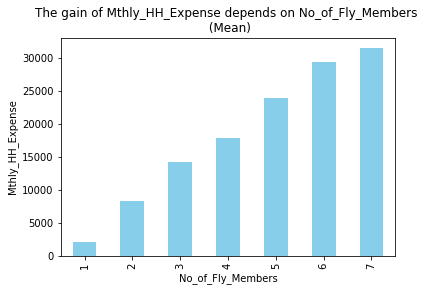

In [14]:
drawn_relation(df,'No_of_Fly_Members','Mthly_HH_Expense')

* **Biểu đồ 2**: Với các nhóm gia đình mà thành viên có trình độ học vấn càng cao thì thu nhập trung bình hằng tháng cũng cao hơn các nhóm gia đình có trình độ học vấn thấp.

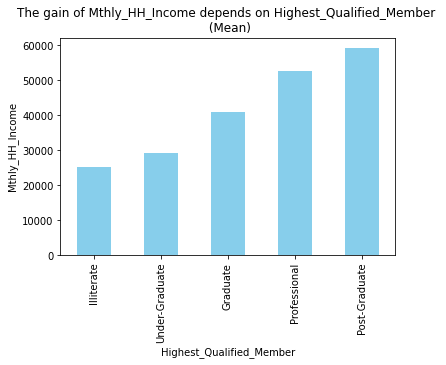

In [15]:
drawn_relation(df,'Highest_Qualified_Member','Mthly_HH_Income')

* **Biểu đồ 3**: Thu nhập và chi tiêu hằng tháng của các hộ dân. 

Thu nhập trung bình của mỗi cá nhân vào năm 2020 là khoảng 4,2 triệu đồng  và chi tiêu trung bình là 2.89 triệu đồng một tháng(Tổng cục thống kê). Trung bình số lượng thành viên mỗi hộ dân là 4 , suy ra thu nhập trung bình của hộ dân là 16.8 triệu đồng và chi tiêu là 11.56 triệu đồng một tháng. 

In [16]:
print("Trung bình số thành viên trong gia đình: ",int(df['No_of_Fly_Members'].mean()))

Trung bình số thành viên trong gia đình:  4


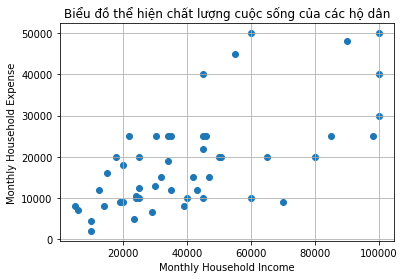

In [17]:
plt.scatter( x='Mthly_HH_Income', y='Mthly_HH_Expense',data=df)
plt.xlabel("Monthly Household Income")
plt.ylabel("Monthly Household Expense")
plt.title("Biểu đồ thể hiện chất lượng cuộc sống của các hộ dân")
plt.grid(True)


* **Biểu đồ 4**: Trình độ học vấn của người dân được đảm bảo, có $\frac{1}{5}$ dân số bị mù chữ, phần lớn thuộc nhóm Under-Graduate, Graduate, Professional

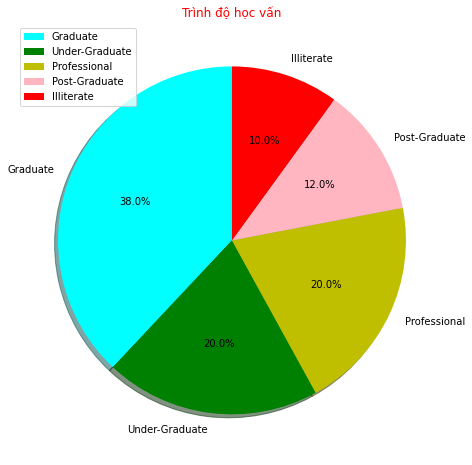

In [52]:
drawn_pie(df['Highest_Qualified_Member'],'Trình độ học vấn')

* **Biểu đồ 5**: Số lượng thành viên của mỗi gia đình

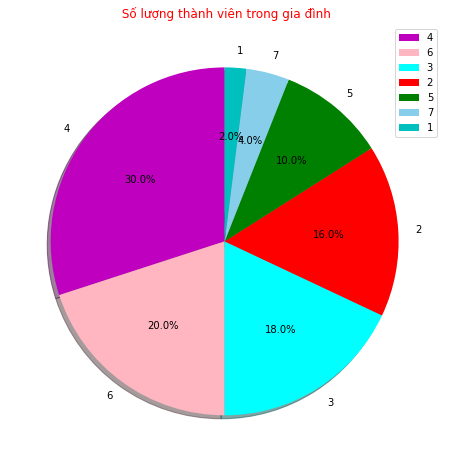

In [41]:
drawn_pie(df['No_of_Fly_Members'],' Số lượng thành viên trong gia đình')

* **Biểu đồ 6**: Phần lớn các hộ gia đình chỉ có một thành viên có thu nhập, tiếp đến là có hai thành viên và rất ít gia đình có bốn thành viên có thu nhập

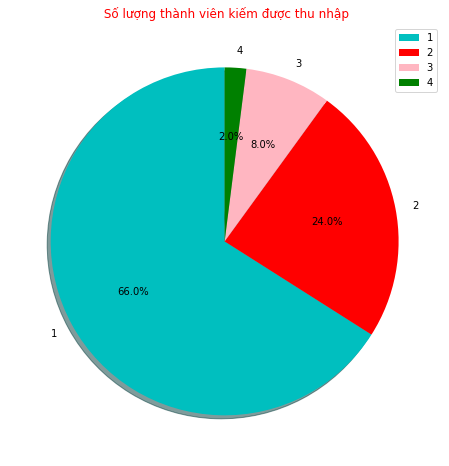

In [62]:
drawn_pie(df['No_of_Earning_Members'],' Số lượng thành viên kiếm được thu nhập')

In [20]:
def calculate_stat_value(data):
  print("Nhỏ nhất:      ",data.min())
  print("Lớn nhất:      ",data.max())
  print('Trung bình:    ',data.mean())
  print('Trung vị:      ',data.median())
  print('Độ lệch chuẩn: ',data.std())
  print('Phân vị Q1:    ',data.quantile(0.25))
  print('Phân vị Q3:    ',data.quantile(0.75))

* **Biểu đồ 7**: Thu nhập hằng tháng của các gia đình:

In [21]:
calculate_stat_value(df['Mthly_HH_Income'])

Nhỏ nhất:       5000
Lớn nhất:       100000
Trung bình:     41558.0
Trung vị:       35000.0
Độ lệch chuẩn:  26097.908978713687
Phân vị Q1:     23550.0
Phân vị Q3:     50375.0


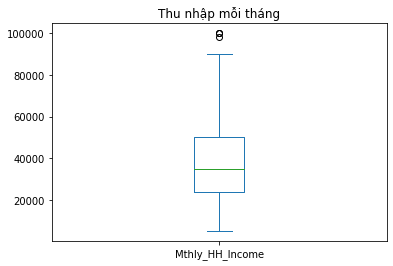

In [22]:
drawn_boxplot(df['Mthly_HH_Income'],"Thu nhập mỗi tháng")

* **Biểu đồ 8:** Chi tiêu hằng tháng của các gia đinh

In [23]:
calculate_stat_value(df['Mthly_HH_Expense'])

Nhỏ nhất:       2000
Lớn nhất:       50000
Trung bình:     18818.0
Trung vị:       15500.0
Độ lệch chuẩn:  12090.216824240286
Phân vị Q1:     10000.0
Phân vị Q3:     25000.0


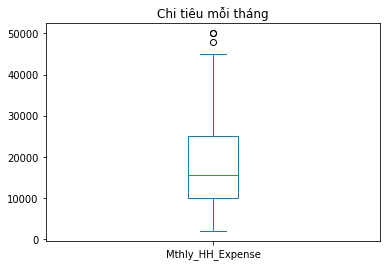

In [24]:
drawn_boxplot(df['Mthly_HH_Expense'],"Chi tiêu mỗi tháng")

* **Biểu đồ 9:** Chi phí thuê và phát sinh hằng tháng:


In [25]:
calculate_stat_value(df['Emi_or_Rent_Amt'])

Nhỏ nhất:       0
Lớn nhất:       35000
Trung bình:     3060.0
Trung vị:       0.0
Độ lệch chuẩn:  6241.434947516607
Phân vị Q1:     0.0
Phân vị Q3:     3500.0


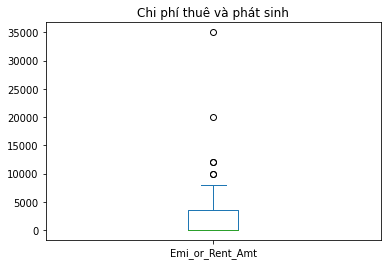

In [26]:
drawn_boxplot(df['Emi_or_Rent_Amt'],'Chi phí thuê và phát sinh')